# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset de treino
treino = pd.read_csv(r"train.csv")

In [3]:
# Visualizando essa base
treino.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Retornando o shape da base
treino.shape

(1460, 81)

In [5]:
# E as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [6]:
# Visualizando quantidade de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [7]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = treino.columns[treino.isnull().sum()/treino.shape[0] > 0.1]

In [8]:
# Eliminando essas colunas
treino = treino.drop(eliminar, axis = 1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios**
    - Vamos **eliminar as colunas de texto**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [9]:
# Retirando os valores vazios
treino = treino.fillna(-1)

In [10]:
# Verificando novamente as informações
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending = False).head(20)

Id              0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
Electrical      0.0
GarageType      0.0
GarageFinish    0.0
HeatingQC       0.0
dtype: float64

In [11]:
# Agora selecionando apenas as colunas numéricas
col_nr = treino.columns[treino.dtypes != "object"]
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
# E criar uma nova base com esses valores
treino = treino.loc[:,col_nr]

- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
# Selecionando X e y
X = treino.drop("SalePrice", axis = 1)
y = treino.SalePrice

In [14]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [16]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [17]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [18]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [19]:
# Importando a árvore de regressão
from sklearn import tree

In [20]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [21]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [22]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [23]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [24]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [25]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [26]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [27]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.1873930649
1533982883.4447777


In [28]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

28056.265560165975
2094186173.2572615


In [29]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [30]:
# Importando o matplotlib
import matplotlib.pyplot as plt

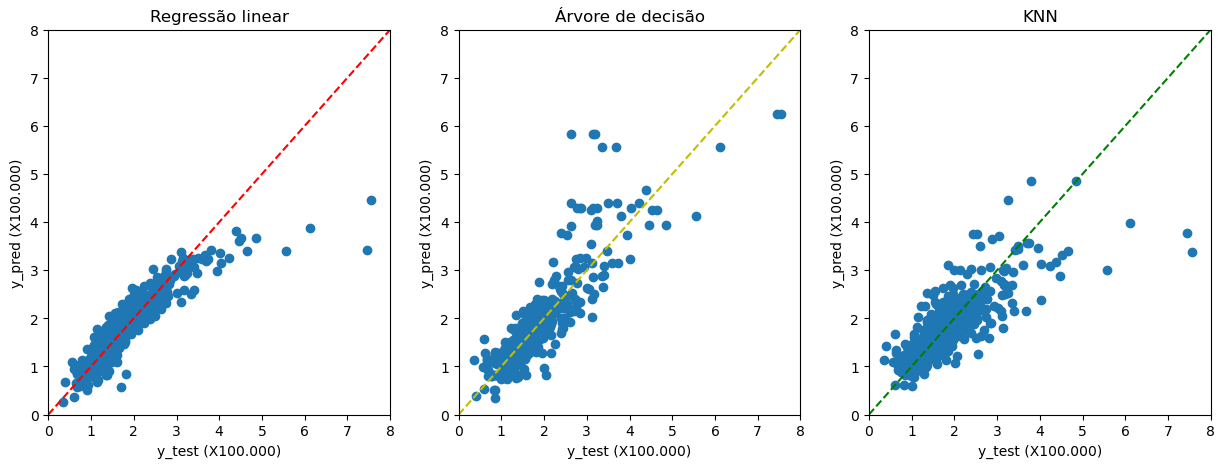

In [52]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols = 3, figsize = (15,5))

ax[0].scatter(y_test / 100000, y_pred_rl / 100000)
ax[0].plot([0, 8] , [0, 8], "--r")
ax[1].scatter(y_test / 100000, y_pred_ad / 100000)
ax[1].plot([0, 8] , [0, 8], "--y")
ax[2].scatter(y_test / 100000, y_pred_knn / 100000)
ax[2].plot([0, 8] , [0, 8], "--g")

ax[0].set(xlim = (0, 8), ylim = (0,8))
ax[0].set_xlabel("y_test (X100.000)")
ax[0].set_ylabel("y_pred (X100.000)")
ax[0].set_title("Regressão linear")
ax[1].set(xlim = (0, 8), ylim = (0,8))
ax[1].set_xlabel("y_test (X100.000)")
ax[1].set_ylabel("y_pred (X100.000)")
ax[1].set_title("Árvore de decisão")
ax[2].set(xlim = (0, 8), ylim = (0,8))
ax[2].set_xlabel("y_test (X100.000)")
ax[2].set_ylabel("y_pred (X100.000)")
ax[2].set_title("KNN")

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [66]:
# Importando a base de teste
teste = pd.read_csv("test.csv")

In [67]:
# Visualizando a base
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [68]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis = 1)

In [70]:
# Verificando as colunas numéricas
col_nr_test = teste.columns[teste.dtypes != "object"]

In [71]:
# Mantendo também apenas as colunas numéricas
col_nr_test = teste.columns[teste.dtypes != "object"]

In [72]:
# Verificando a base restante
teste = teste.loc[: , col_nr_test]

In [80]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending = False).head(15)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
dtype: int64

- **Podemos alterar todos esses valores vazios por -1**
    - Não vai ser confundido com o zero
    - Depois conseguimos retornar de forma fácil os valores que fizemos esse ajuste

In [83]:
# Trocando todos os valores vazios por -1
teste = teste.fillna(-1)

In [84]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending = False).head(15)

Id               0
MSSubClass       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [87]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred_test = reg_rl.predict(teste)

In [91]:
# Podemos adicionar essa coluna de previsão na nossa base
teste["SalePrice"] = y_pred_test

In [92]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[["Id" , "SalePrice"]]
base_kaggle.head()

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229


In [93]:
# Podemos então exportar essa base
base_kaggle.to_csv("resultado1.csv", index = False)